In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="talk", style="ticks")

# SM Potential

In [2]:
phi = sp.symbols("phi", positive=True)
V = -phi**2 + phi**4
V

phi**4 - phi**2

In [3]:
d1 = sp.diff(V, phi, 1)
d2 = sp.diff(V, phi, 2)
d3 = sp.diff(V, phi, 3)

In [4]:
phi_min, = sp.solve(d1, phi)
phi_min

sqrt(2)/2

# Alternative Potential

In [5]:
a, b, c = sp.symbols("a b c", real=True)
V_alt = a * phi**2 + b * phi**4 + c * phi**6
V_alt

a*phi**2 + b*phi**4 + c*phi**6

In [6]:
d1_alt = sp.diff(V_alt, phi, 1)
d2_alt = sp.diff(V_alt, phi, 2)
d3_alt = sp.diff(V_alt, phi, 3)

In [7]:
eq1 = sp.Eq(d1_alt.subs({phi: phi_min}), 0)
eq2 = sp.Eq(d2_alt.subs({phi: phi_min}), d2.subs({phi: phi_min}))

In [8]:
V_alt = V_alt.subs(sp.solve([eq1, eq2], a, b))
V_alt

c*phi**6 + phi**4*(1 - 3*c/2) + phi**2*(3*c/4 - 1)

# Series expansion about vacuum state

In [9]:
h = sp.symbols("h", real=True)

In [10]:
sp.series(V.subs({phi: phi_min + h}), h, n=5)

h**4 + 2*sqrt(2)*h**3 + 2*h**2 - 1/4

In [11]:
sp.series(V_alt.subs({phi: phi_min + h, c: 0.5}), h, n=5)

-0.1875 + 2.0*h**2 + 3.0*sqrt(2)*h**3 + 4.0*h**4 + O(h**5)

In [12]:
sp.series(V_alt.subs({phi: phi_min + h, c: -0.5}), h, n=5)

-0.3125 + 2.0*h**2 + 1.0*sqrt(2)*h**3 - 2.0*h**4 + O(h**5)

In [13]:
palette = sns.color_palette()
palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

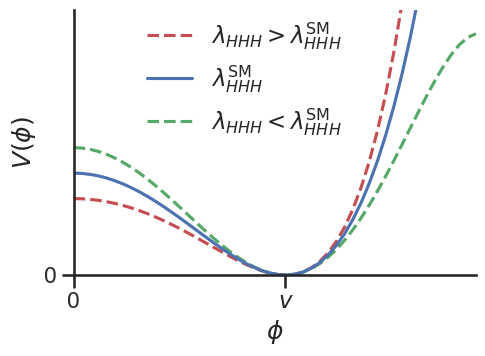

In [14]:
x = np.linspace(0, 1.9)
f = sp.lambdify(phi, V)
f_alt_1 = sp.lambdify(phi, V_alt.subs({c: 0.5}))
f_alt_2 = sp.lambdify(phi, V_alt.subs({c: -0.5}))

scale = 1.3
fig, ax = plt.subplots(figsize=(scale * 4, scale * 3))
fig.set_tight_layout(True)
sns.despine(fig)

ax.set_ylim(0, 0.65)
ax.set_xlim(0, 1.9)
ax.set_ylabel(r"$V(\phi)$")
ax.set_xlabel(r"$\phi$")

ax.set_xticks([0, 1])
ax.set_xticklabels(["0", r"$v$"])

ax.set_yticks([0])

l1, = ax.plot(x, f_alt_1(x * phi_min) - f_alt_1(phi_min), ls="--", c=palette[3], label=r"$\lambda_{HHH} > \lambda_{HHH}^{\mathrm{SM}}$")
l2, = ax.plot(x, f_alt_2(x * phi_min) - f_alt_2(phi_min), ls="--", c=palette[2], label=r"$\lambda_{HHH} < \lambda_{HHH}^{\mathrm{SM}}$")
l3, = ax.plot(x, f(x * phi_min) - f(phi_min), c=palette[0], label=r"$\lambda_{HHH}^{\mathrm{SM}}$")

ax.legend(handles=[l1, l3, l2], frameon=False, loc="upper left", bbox_to_anchor=(0.13, 1.04))
fig.savefig("../figures/higgs_potential_variation.pdf")

In [15]:
sp.diff(V_alt, phi, 3).subs({phi: phi_min, c: 0.5})

18.0*sqrt(2)

In [16]:
sp.diff(V_alt, phi, 3).subs({phi: phi_min, c: 0})

12*sqrt(2)

In [17]:
sp.diff(V_alt, phi, 3).subs({phi: phi_min, c: -0.5})

6.0*sqrt(2)